## PART A: Create an Artificial Dataset (Total 30 Points)

In [315]:
# kutuphaneler
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Q1 (5 PTS)

In [377]:
# age listesini olustur
age = random.choices(
    range(18, 26),
    k=10000
)

In [378]:
# team listesini olustur
team = random.choices(
    ['Fenerbahce', 'Galatasaray', 'Besiktas', 'Trabzonspor', 'Other'],
    weights=(25, 25, 25, 10, 15),
    k=10000
)

In [379]:
# rating listesini olustur
rating = random.choices(
    range(1, 6),
    k=10000
)

In [380]:
# income listesini olustur
income = random.choices(
    range(3000, 10001, 100),
    k=10000
)

In [381]:
# dataframe olustur
Q1 = pd.DataFrame.from_dict({'age': age, 'team': team, 'rating': rating, 'income': income})

In [382]:
# ciktiyi kontrol et
Q1.head()

,age,team,rating,income
0,24,Galatasaray,2,5500
1,19,Other,3,4700
2,19,Fenerbahce,5,3000
3,25,Galatasaray,4,5700
4,25,Trabzonspor,4,3800


In [383]:
# ciktinin ortalamalarini kontrol et
Q1.income.mean(), Q1.rating.mean(), Q1.age.mean()

(6525.32, 3.0042, 21.5294)

### Q2) (10 PTS)

In [384]:
# olasiliklari tanimlayacak fonksiyonu olusturdum
gen_probs = lambda probs: [probs[0]] * 30 + [probs[1]] * 10 + [probs[2]] * 20 + [probs[3]] * 30 + [probs[4]] * 10

In [385]:
# apply fonksiyonuna verecegim sorgu fonksiyonu
def grade(row):
    if row.team == 'Fenerbahce' and (row.rating == 4 or row.rating == 5):
        return random.choices(range(1, 101), weights=gen_probs([0, 1, 30, 60, 9]), k=1)[0]
    
    elif row.team == 'Fenerbahce' and (row.rating == 1 or row.rating == 2 or row.rating == 3):
        return random.choices(range(1, 101), weights=gen_probs([30, 20, 20, 30, 0]), k=1)[0]
    
    elif row.team != 'Fenerbahce' and (row.rating == 4 or row.rating == 5):
        return random.choices(range(1, 101), weights=gen_probs([30, 10, 20, 30 ,10]), k=1)[0]
    
    elif row.team != 'Fenerbahce' and (row.rating == 1 or row.rating == 2 or row.rating == 3):
        return random.choices(range(1, 101), weights=gen_probs([60, 10, 30, 0, 0]), k=1)[0]
    
    else:
        # hicbir sorgunun tutmamasi halinde goreyim diye yazdim. (imkansiz sonuc)
        return -1

In [391]:
# Q1 dataframe ini Q2 dataframe ine esitle ve Q2 dataframe inde grade isimli bir sutun olustur
# bu sutunlari grade fonksiyonunun ciktilariyla doldur
Q2 = Q1

Q2['grade'] = Q2.apply(grade, axis=1)
Q2.head(15)

,age,team,rating,income,grade
0,24,Galatasaray,2,5500,16
1,19,Other,3,4700,9
2,19,Fenerbahce,5,3000,79
3,25,Galatasaray,4,5700,26
4,25,Trabzonspor,4,3800,70
5,22,Trabzonspor,3,9700,29
6,22,Fenerbahce,2,7700,25
7,24,Trabzonspor,3,3900,8
8,24,Other,3,8900,5
9,24,Fenerbahce,1,4200,30


### Q3) (5 PTS)

In [392]:
# ortalamalar tam tutmuyor sebebini bilmiyorum
# team, rating, grade sutunlarini al
# team ve rating ile grupla
# team ve rating sutunlarini index olarak alma
# gruplanmis verilerin ortalamasini al ve 0 dan sonra 2 basamakli olacak sekilde yuvarla
Q3 = Q2

Q3 = Q3[['team', 'rating', 'grade']].groupby(['team', 'rating'], as_index=False).mean().round(2)
Q3.sort_values(by=['grade'], ascending=False)

,team,rating,grade
9,Fenerbahce,5,70.45
8,Fenerbahce,4,68.94
18,Other,4,48.47
4,Besiktas,5,48.28
24,Trabzonspor,5,48.21
3,Besiktas,4,47.67
14,Galatasaray,5,46.94
6,Fenerbahce,2,46.92
13,Galatasaray,4,46.14
5,Fenerbahce,1,46.08


### Q4) (10 PTS)

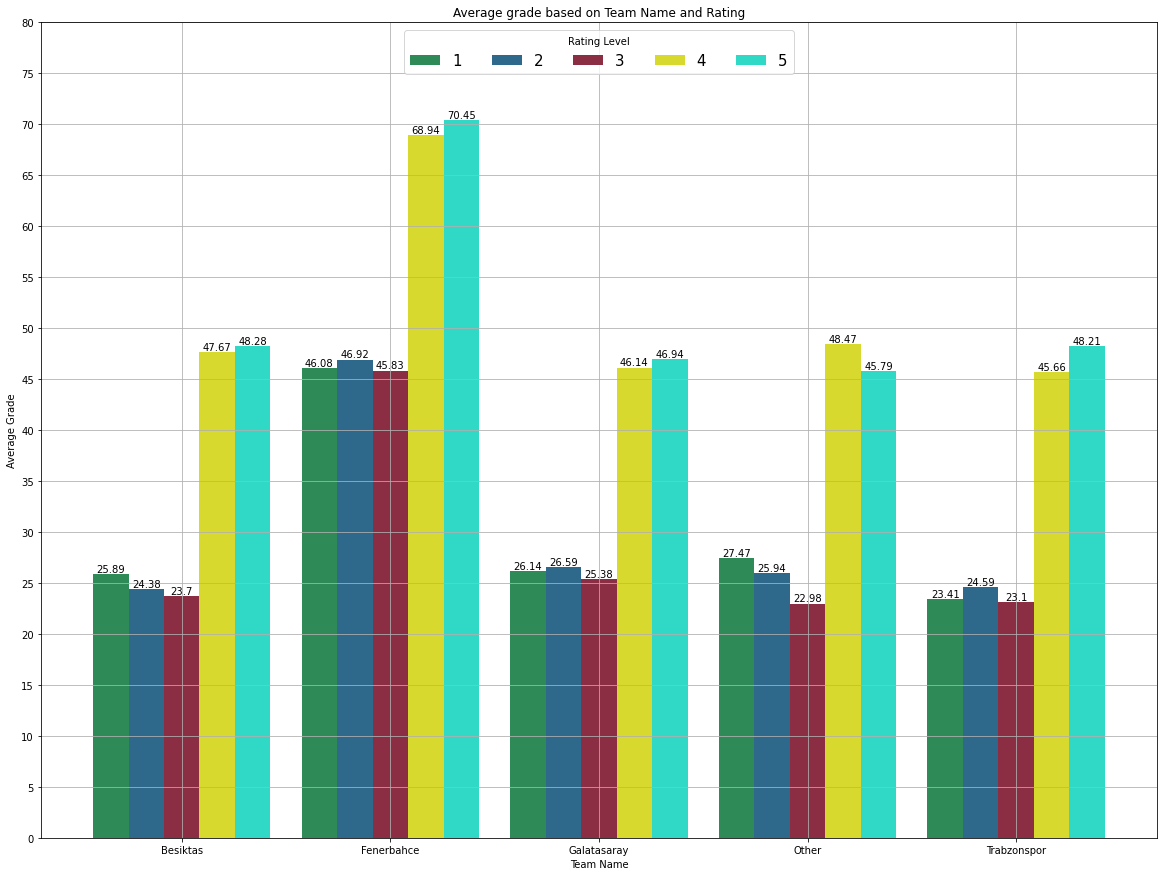

In [393]:
fig = Q3.pivot(index='team', 
         columns='rating', 
         values='grade').plot(kind='bar',
                              figsize=(20, 15),
                              width=.85,
                              color=['#2E8B57', '#2E688B', '#8B2E43', '#D8D92F', '#2FD9C6'])

plt.grid() # grafigi karelere bol

plt.title('Average grade based on Team Name and Rating') # grafige baslik ver

plt.xlabel('Team Name') # grafigin x ekseninin basligi
plt.ylabel('Average Grade') # grafigin y ekseninin basligi

plt.yticks(range(0, 85, 5)) # grafigin y ekseninin araliklari
plt.xticks(rotation=0) # grafigin x ekseninin elemanlarinin yatay gozukmesi

plt.legend(title='Rating Level', loc='upper center', ncol=5, fontsize=15) # legend i duzenle

# her bir barin uzerine degerlerini yazdir
for container in fig.containers:
    fig.bar_label(container)

plt.show() # grafigi goster

# PART B: Water Quality Data (Total 70 Points)

In [229]:
# veriyi oku ve data degiskenine ata
data = pd.read_csv('data_.csv', encoding= 'unicode_escape', sep=';')
data.rename(columns={'Unnamed: 0': 'X',
                 'Unnamed: 1': 'X.1',
                 'Parameter': 'Parameter',
                 'Unit': 'Unit',
                 'Year': 'Year',
                 '1': 'X1',
                 '2': 'X2',
                 '3': 'X3',
                 '4': 'X4',
                 '5': 'X5',
                 '6': 'X6',
                 '7': 'X7',
                 '8': 'X8',
                 '9': 'X9',
                 '10': 'X10',
                 '11': 'X11',
                 '12': 'X12'}, inplace=True)

In [230]:
data.head(10)

,X,X.1,Parameter,Unit,Year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,Station No: 01-11-00-001; Station Name: MERIC ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Al,µg/L,2013.0,NaN,NaN,NaN,168.25,NaN,156.87,NaN,NaN,NaN,161.21,NaN,NaN
3,NaN,As,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,As,µg/L,1987.0,NaN,NaN,NaN,4.00,NaN,1.00,NaN,NaN,NaN,6.00,NaN,NaN
5,NaN,NaN,As,µg/L,1992.0,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,As,µg/L,1994.0,NaN,NaN,NaN,NaN,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,As,µg/L,2013.0,NaN,3.49,NaN,1.17,NaN,52.20,NaN,NaN,NaN,2.74,NaN,NaN
8,NaN,BOD5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,BOD5,mg/L,1985.0,NaN,NaN,NaN,5.10,NaN,6.10,NaN,7.2,NaN,7.70,NaN,7.3


### Q5 (10 PTS)

In [394]:
Q5 = data

Q5['X'].fillna(method='ffill', inplace=True) # X sutunundaki NaN degerleri doldur
Q5 = Q5[Q5['Parameter'].notnull()] # Parameter sutunundaki NaN degerlerinin hepsini sil
Q5.rename(columns={'X': 'Station_Name'}, inplace=True) # X sutununu Station_Name olarak degistir
Q5.drop(columns=['X.1', 'Unit'], axis=1, inplace=True) # X.1 ve Unit sutunlarini sil

Q5.head(10)

,Station_Name,Parameter,Year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
2,Station No: 01-11-00-001; Station Name: MERIC ...,Al,2013.0,NaN,NaN,NaN,168.25,NaN,156.87,NaN,NaN,NaN,161.21,NaN,NaN
4,Station No: 01-11-00-001; Station Name: MERIC ...,As,1987.0,NaN,NaN,NaN,4.00,NaN,1.00,NaN,NaN,NaN,6.00,NaN,NaN
5,Station No: 01-11-00-001; Station Name: MERIC ...,As,1992.0,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Station No: 01-11-00-001; Station Name: MERIC ...,As,1994.0,NaN,NaN,NaN,NaN,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN
7,Station No: 01-11-00-001; Station Name: MERIC ...,As,2013.0,NaN,3.49,NaN,1.17,NaN,52.20,NaN,NaN,NaN,2.74,NaN,NaN
9,Station No: 01-11-00-001; Station Name: MERIC ...,BOD5,1985.0,NaN,NaN,NaN,5.10,NaN,6.10,NaN,7.2,NaN,7.70,NaN,7.3
10,Station No: 01-11-00-001; Station Name: MERIC ...,BOD5,1986.0,NaN,NaN,6.5,7.00,NaN,4.90,NaN,3.6,NaN,6.80,NaN,9.7
11,Station No: 01-11-00-001; Station Name: MERIC ...,BOD5,1987.0,NaN,9.20,NaN,3.80,NaN,4.20,NaN,NaN,NaN,3.80,NaN,9.6
12,Station No: 01-11-00-001; Station Name: MERIC ...,BOD5,1988.0,NaN,9.30,NaN,2.70,NaN,5.70,NaN,7.0,NaN,2.10,NaN,6.7
13,Station No: 01-11-00-001; Station Name: MERIC ...,BOD5,1989.0,NaN,5.00,NaN,3.60,NaN,6.00,NaN,6.7,NaN,4.50,NaN,8.0


### Q6 (5 PTS)

In [396]:
Q6 = Q5

Q6 = Q6.astype({'Year':'int'}) # Year sutununu ondalikli sayidan tamsayiya cevir (.0 i sil)
Q6['Year'] = pd.to_datetime(Q6['Year'].astype(str) + '-01-01', format='%Y-%m-%d') # Year sutununu datetime objesi yap

Q6.head(10)

,Station_Name,Parameter,Year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
2,Station No: 01-11-00-001; Station Name: MERIC ...,Al,2013-01-01,NaN,NaN,NaN,168.25,NaN,156.87,NaN,NaN,NaN,161.21,NaN,NaN
4,Station No: 01-11-00-001; Station Name: MERIC ...,As,1987-01-01,NaN,NaN,NaN,4.00,NaN,1.00,NaN,NaN,NaN,6.00,NaN,NaN
5,Station No: 01-11-00-001; Station Name: MERIC ...,As,1992-01-01,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Station No: 01-11-00-001; Station Name: MERIC ...,As,1994-01-01,NaN,NaN,NaN,NaN,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN
7,Station No: 01-11-00-001; Station Name: MERIC ...,As,2013-01-01,NaN,3.49,NaN,1.17,NaN,52.20,NaN,NaN,NaN,2.74,NaN,NaN
9,Station No: 01-11-00-001; Station Name: MERIC ...,BOD5,1985-01-01,NaN,NaN,NaN,5.10,NaN,6.10,NaN,7.2,NaN,7.70,NaN,7.3
10,Station No: 01-11-00-001; Station Name: MERIC ...,BOD5,1986-01-01,NaN,NaN,6.5,7.00,NaN,4.90,NaN,3.6,NaN,6.80,NaN,9.7
11,Station No: 01-11-00-001; Station Name: MERIC ...,BOD5,1987-01-01,NaN,9.20,NaN,3.80,NaN,4.20,NaN,NaN,NaN,3.80,NaN,9.6
12,Station No: 01-11-00-001; Station Name: MERIC ...,BOD5,1988-01-01,NaN,9.30,NaN,2.70,NaN,5.70,NaN,7.0,NaN,2.10,NaN,6.7
13,Station No: 01-11-00-001; Station Name: MERIC ...,BOD5,1989-01-01,NaN,5.00,NaN,3.60,NaN,6.00,NaN,6.7,NaN,4.50,NaN,8.0


### Q7 (5 PTS)

In [397]:
Q7 = Q6

# zaman araliklarini al
min_date = Q7['Year'].min()
max_date = Q7['Year'].max()

date_range = pd.date_range(start=min_date, end=max_date, freq='AS')

Q7_yearly = pd.DataFrame(list(itertools.product(Q7['Station_Name'].unique(), Q7['Parameter'].unique(), date_range)), 
                         columns=['Station_Name', 'Parameter', 'Year'])
Q7 = pd.merge(Q7, Q7_yearly, on=['Station_Name', 'Parameter', 'Year'], how='right')

# Station Name ve Parameter sutunlarina gore sirala
Q7 = Q7.sort_values(by=['Station_Name', 'Parameter'])

In [398]:
Q7.iloc[:30]

,Station_Name,Parameter,Year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,Station No: 01-11-00-001; Station Name: MERIC ...,Al,1985-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Station No: 01-11-00-001; Station Name: MERIC ...,Al,1986-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Station No: 01-11-00-001; Station Name: MERIC ...,Al,1987-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Station No: 01-11-00-001; Station Name: MERIC ...,Al,1988-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Station No: 01-11-00-001; Station Name: MERIC ...,Al,1989-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Station No: 01-11-00-001; Station Name: MERIC ...,Al,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Station No: 01-11-00-001; Station Name: MERIC ...,Al,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Station No: 01-11-00-001; Station Name: MERIC ...,Al,1992-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Station No: 01-11-00-001; Station Name: MERIC ...,Al,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Station No: 01-11-00-001; Station Name: MERIC ...,Al,1994-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [399]:
Q7.iloc[30:60]

,Station_Name,Parameter,Year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
30,Station No: 01-11-00-001; Station Name: MERIC ...,As,1986-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Station No: 01-11-00-001; Station Name: MERIC ...,As,1987-01-01,NaN,NaN,NaN,4.00,NaN,1.0,NaN,NaN,NaN,6.00,NaN,NaN
32,Station No: 01-11-00-001; Station Name: MERIC ...,As,1988-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Station No: 01-11-00-001; Station Name: MERIC ...,As,1989-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Station No: 01-11-00-001; Station Name: MERIC ...,As,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Station No: 01-11-00-001; Station Name: MERIC ...,As,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Station No: 01-11-00-001; Station Name: MERIC ...,As,1992-01-01,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Station No: 01-11-00-001; Station Name: MERIC ...,As,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,Station No: 01-11-00-001; Station Name: MERIC ...,As,1994-01-01,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
39,Station No: 01-11-00-001; Station Name: MERIC ...,As,1995-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Q8 (5 PTS)

In [400]:
Q8 = Q7

# Station Code sutununu olustur
Q8['Station_Code'] = Q8['Station_Name'].apply(lambda val: val.split(';')[0].split('Station No: ')[-1])

In [401]:
# Station Name sutununu olustur
Q8['Station_Name'] = Q8['Station_Name'].apply(lambda val: val.split(';')[1].split('Station Name: ')[-1])

In [402]:
# sutunlarin siralarini tekrar duzenle (Station_Code sutunu sondaydi)
Q8 = Q8[['Station_Code', 'Station_Name', 'Parameter', 'Year',
         'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12']]
Q8.head(10)

,Station_Code,Station_Name,Parameter,Year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1986-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1987-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1988-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1989-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1992-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1994-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Q9 (5 PTS)

In [403]:
Q9 = Q8

# X ile baslayan sutun isimlerini bul
x_columns = [column_name for column_name in Q9.columns if column_name.startswith("X")]

# aylari ekle
Q9 = pd.melt(Q9, id_vars=['Station_Code', 'Station_Name', 'Parameter', 'Year'], 
             value_vars=x_columns, 
             var_name='Month',
             value_name='Value')
Q9 = Q9.sort_values(by=['Station_Code', 'Station_Name', 'Parameter', 'Year'])
Q9.head(10)

,Station_Code,Station_Name,Parameter,Year,Month,Value
0,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985-01-01,X1,NaN
18502,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985-01-01,X2,NaN
37004,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985-01-01,X3,NaN
55506,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985-01-01,X4,NaN
74008,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985-01-01,X5,NaN
92510,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985-01-01,X6,NaN
111012,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985-01-01,X7,NaN
129514,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985-01-01,X8,NaN
148016,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985-01-01,X9,NaN
166518,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985-01-01,X10,NaN


### Q10 (10 PTS)

In [404]:
Q10 = Q9

# Month sutunu verilerinden X karakterini sil ve karakterleri integer formatina cevir
Q10['Month'] = Q10['Month'].str.replace('X', '').astype(int)

In [405]:
# Year sutunundan sadece yili cek ve sutunun elemanlarini bu sekilde degistir
Q10['Year'] = pd.DatetimeIndex(Q10['Year']).year

In [406]:
# Year ve Month sutunlarinin birlesiminden Year_Month sutununu olustur
Q10['Year_Month'] = pd.to_datetime(Q10[['Year', 'Month']].assign(Day=1))

In [407]:
Q10.head(20)

,Station_Code,Station_Name,Parameter,Year,Month,Value,Year_Month
0,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985,1,NaN,1985-01-01
18502,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985,2,NaN,1985-02-01
37004,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985,3,NaN,1985-03-01
55506,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985,4,NaN,1985-04-01
74008,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985,5,NaN,1985-05-01
92510,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985,6,NaN,1985-06-01
111012,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985,7,NaN,1985-07-01
129514,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985,8,NaN,1985-08-01
148016,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985,9,NaN,1985-09-01
166518,01-11-00-001,MERIC NEHRI-KAPIKULE,Al,1985,10,NaN,1985-10-01


### Q11 (5 PTS)

In [408]:
Q11 = Q10

Q11 = Q11.pivot(index=["Station_Code", "Station_Name", "Year", "Month", "Year_Month"], 
                columns="Parameter", 
                values="Value")
Q11.reset_index(inplace=True)
columns = ['Station_Code', 'Station_Name', 'Year', 'Month', 'Year_Month',
             'Al','As','B','Ba','BOD5','Ca++','Cd','Cl-','CN-','Co','CO2','COD','Col','Cr','Cu','DO','DO%',
             'E-Coli','EC','F-','F-Coli','F-Strp','Fe','Fenoller','Hg','Hidrokarbonlar','K+','M-Al','M.Oil',
             'Mg++','Mn','Na+','NH4-N','Ni','NO2-N','NO3-N','o-PO4','P-Al','PAH','Pb','pH','pV','Qanlik','Se',
             'SO4=','SS','Surfaktanlar','T','T-Coli','TDS','TH','TKN','TOC','Top.N','Top.P','Tot.Pest.','Turb','Zn']
Q11 = Q11[columns]
Q11.head(4)

Parameter,Station_Code,Station_Name,Year,Month,Year_Month,Al,As,B,Ba,BOD5,...,T-Coli,TDS,TH,TKN,TOC,Top.N,Top.P,Tot.Pest.,Turb,Zn
0,01-11-00-001,MERIC NEHRI-KAPIKULE,1985,1,1985-01-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-11-00-001,MERIC NEHRI-KAPIKULE,1985,2,1985-02-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-11-00-001,MERIC NEHRI-KAPIKULE,1985,3,1985-03-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-11-00-001,MERIC NEHRI-KAPIKULE,1985,4,1985-04-01,NaN,NaN,NaN,NaN,5.1,...,NaN,299.0,250.0,NaN,NaN,NaN,NaN,NaN,96.0,NaN


### Q12 (5 PTS)

In [409]:
Q12 = Q11

Q12 = Q12.groupby(['Station_Code', 'Station_Name'])['BOD5'].agg(['min','max','mean','std']).reset_index()
Q12

,Station_Code,Station_Name,min,max,mean,std
0,01-11-00-001,MERIC NEHRI-KAPIKULE,0.0,23.0,4.229630,2.986572
1,01-11-00-002,TUNCA NEHRI-SU AKACAGI,0.0,16.0,4.489933,3.049296
2,01-11-00-003,ARDA NEHRI-ESKI DEMIRYOLU KOPRUSU,0.0,25.0,2.238889,2.458612
3,01-11-00-004,MEKAN DERE SARAY AYVACIK GOLETI AKS YERI,0.0,10.0,3.800000,3.155243
4,01-11-00-008,MERIC NEHRI-ESKIKOY,0.0,21.0,4.271329,2.895860
5,01-11-00-009,MERIC NEHRI-IPSALA,0.0,40.0,5.466225,4.125803
6,01-11-00-011,CORLU SUYU-CERKEZKOY GIRISI,1.0,108.0,20.821429,23.298678
7,01-11-00-012,CORLU SUYU-CERKEZKOY CIKISI,4.0,1988.0,90.782667,224.980282
8,01-11-00-013,ERGENE NEHRI-CORLU KOPRUSU,0.0,96.0,7.757143,13.830074
9,01-11-00-014,ERGENE NEHRI-INANLI,0.0,215.0,53.127027,41.524838


### Q13 (10 PTS)

In [410]:
Q13 = Q11

parameters = ['BOD5' , 'Ca++' , 'Cl-' , 'Cu' , 'DO' , 'EC' , 'Fe' , 'Mg++' , 'Na+']
Q13 = Q13.groupby(['Station_Code', 'Station_Name']).agg({col: ['min','max','mean','std'] for col in parameters})
Q13 = Q13.reset_index()
Q13.head(4)

Parameter  Station_Code                              Station_Name BOD5        \
                                                                   min   max   
0          01-11-00-001                      MERIC NEHRI-KAPIKULE  0.0  23.0   
1          01-11-00-002                    TUNCA NEHRI-SU AKACAGI  0.0  16.0   
2          01-11-00-003         ARDA NEHRI-ESKI DEMIRYOLU KOPRUSU  0.0  25.0   
3          01-11-00-004  MEKAN DERE SARAY AYVACIK GOLETI AKS YERI  0.0  10.0   

Parameter                       Ca++                                ...  \
               mean       std    min     max       mean        std  ...   
0          4.229630  2.986572   1.48  130.00  71.762778  19.585391  ...   
1          4.489933  3.049296  46.00  130.00  78.891141  14.673304  ...   
2          2.238889  2.458612  20.00   68.00  40.461597  10.212302  ...   
3          3.800000  3.155243  10.00  124.34  57.726000  47.920528  ...   

Parameter          Fe             Mg++                                Na+  \
                 mean         std  min   max       mean       std     min   
0          967.935000  511.180285  0.0  48.0  17.451481  6.670011   5.750   
1          382.233333  291.967113  4.9  48.6  27.510811  8.127800  12.199   
2          284.082353  239.549192  2.4  29.2   9.213846  3.987035   2.300   
3          538.000000  364.359356  1.2  11.5   4.790000  3.554793   3.450   

Parameter                                
              max       mean        std  
0           79.12  29.520247  12.103190  
1          107.64  41.400972  18.033151  
2           40.25  14.974565   7.356644  
3           44.35  16.604000  11.974782  

[4 rows x 38 columns]

### Q14 (10 PTS)

In [413]:
# istenilen sutunlarin verileri
capp = Q11[['Station_Name', 'Year', 'Ca++']]
clm = Q11[['Station_Name', 'Year', 'Cl-']]
ec = Q11[['Station_Name', 'Year', 'EC']]

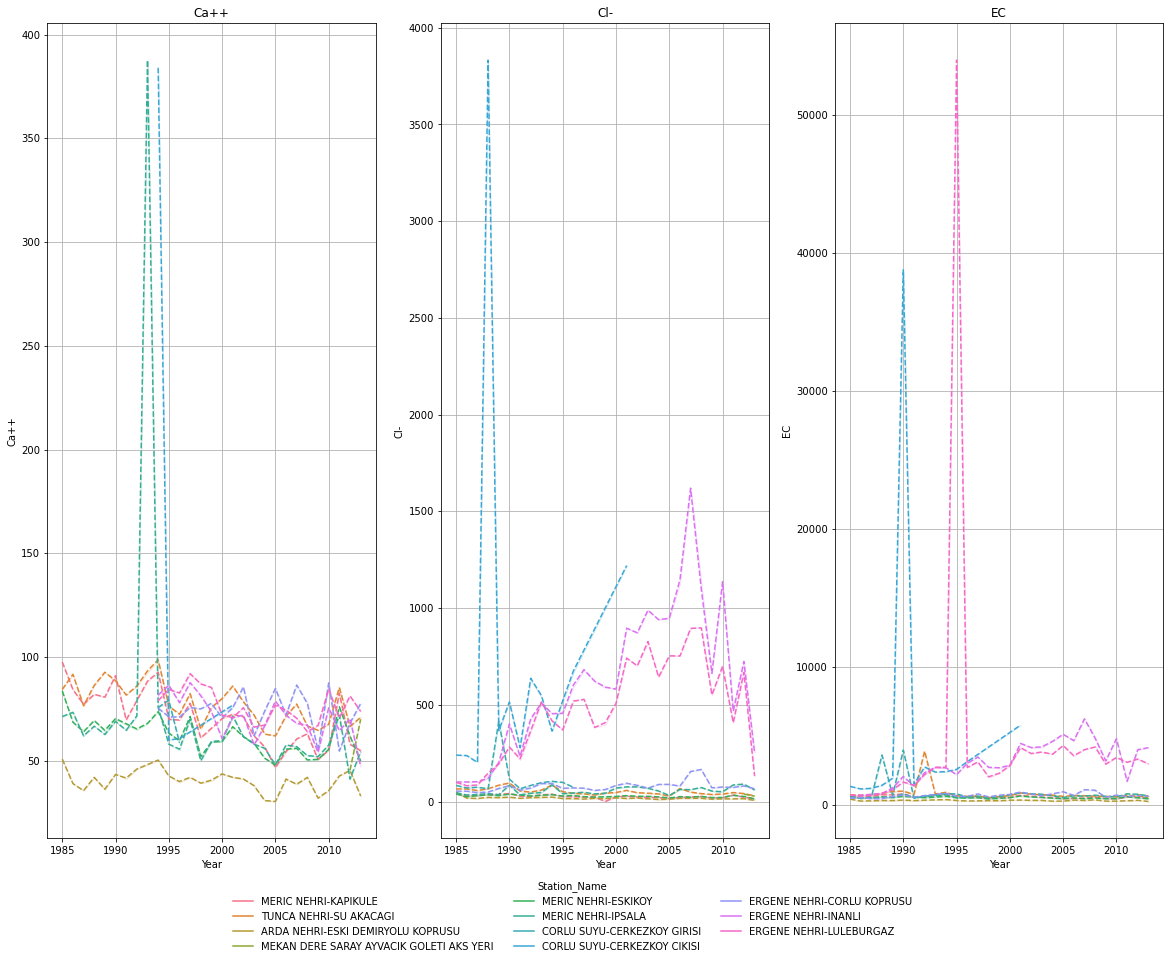

In [414]:
# 3 ayri subplot olustur
fig, axs = plt.subplots(1, 3, figsize=(20, 15))

# subplotlari doldur
sns.lineplot(data=capp, ax=axs[0], x='Year', y='Ca++', hue='Station_Name', linestyle='--', ci=0)
axs[0].set_title('Ca++')

sns.lineplot(data=clm, ax=axs[1], x='Year', y='Cl-', hue='Station_Name', linestyle='--', ci=0)
axs[1].set_title('Cl-')

sns.lineplot(data=ec, ax=axs[2], x='Year', y='EC', hue='Station_Name', linestyle='--', ci=0)
axs[2].set_title('EC')

for plot in axs:
    plot.grid()
    plot.legend().set_visible(False)

# legend olustur
leg = plt.legend(title='Station_Name', bbox_to_anchor=(-.8, -.15), loc='lower center', ncol=3, frameon=False)

plt.show()